In [1]:
import rasterio
import numpy as np
import os

import matplotlib.pyplot as plt

import sys
sys.path.append('/home/esther/lc-mapping/scripts')
import landcover_definitions as lc

#sys.path.append('..')
#import run_model_forward_and_produce_tifs as run_model

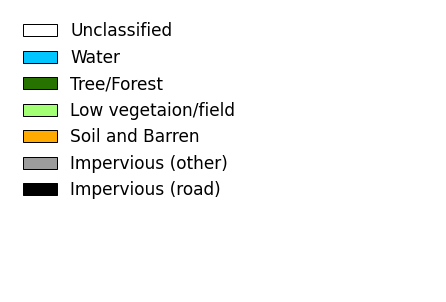

In [2]:
lc.make_legend_figure('chesapeake_7')

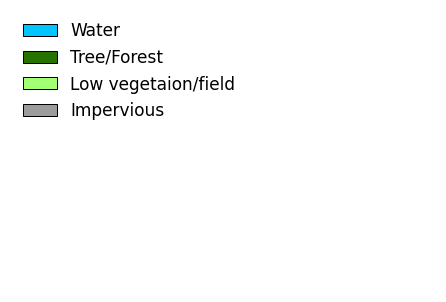

In [3]:
lc.make_legend_figure('chesapeake_4_no_zeros')

# PA from npy files

In [4]:
lc_type = 'chesapeake_4_no_zeros'

In [5]:
tile_id_pa = '3907614_ne_18_1'
img_pa = np.load(f'ny_pa_data_as_npy/img_pa_{tile_id_pa}.npy')
q_pa = np.load(f'ny_pa_data_as_npy/q_pa_{tile_id_pa}.npy')
prior_pa = np.load(f'ny_pa_data_as_npy/prior_pa_{tile_id_pa}.npy')

data_dir_pa = '/home/esther/torchgeo_data/cvpr_chesapeake_landcover/pa_1m_2013_extended-debuffered-test_tiles'
hr_labels_pa = rasterio.open(os.path.join(data_dir_pa, f'm_{tile_id_pa}_lc.tif')).read()[0]

impervious_idxs_highres_orig = [4,5,6]
impervious_idx_condesed = 4
for c_idx in impervious_idxs_highres_orig:
    hr_labels_pa[hr_labels_pa == c_idx] = impervious_idx_condesed
hr_labels_pa = hr_labels_pa - 1

In [6]:

prior_pa = prior_pa / prior_pa.sum(axis=0)

z_pa = (q_pa.T / q_pa.sum(axis=(1,2))).T
r_pa = (z_pa * prior_pa) /(z_pa * prior_pa).sum(axis=0)

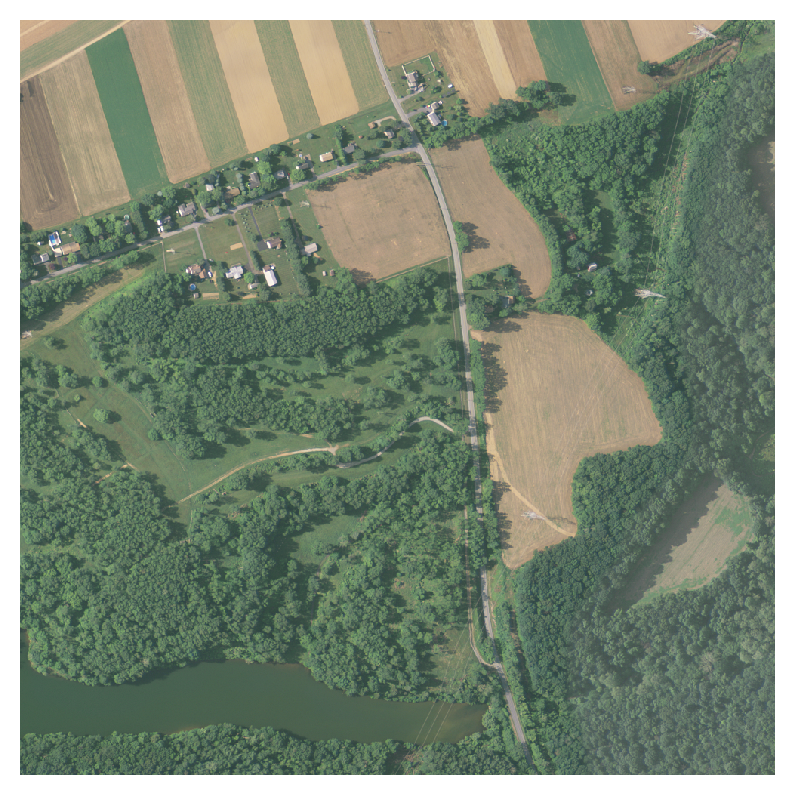

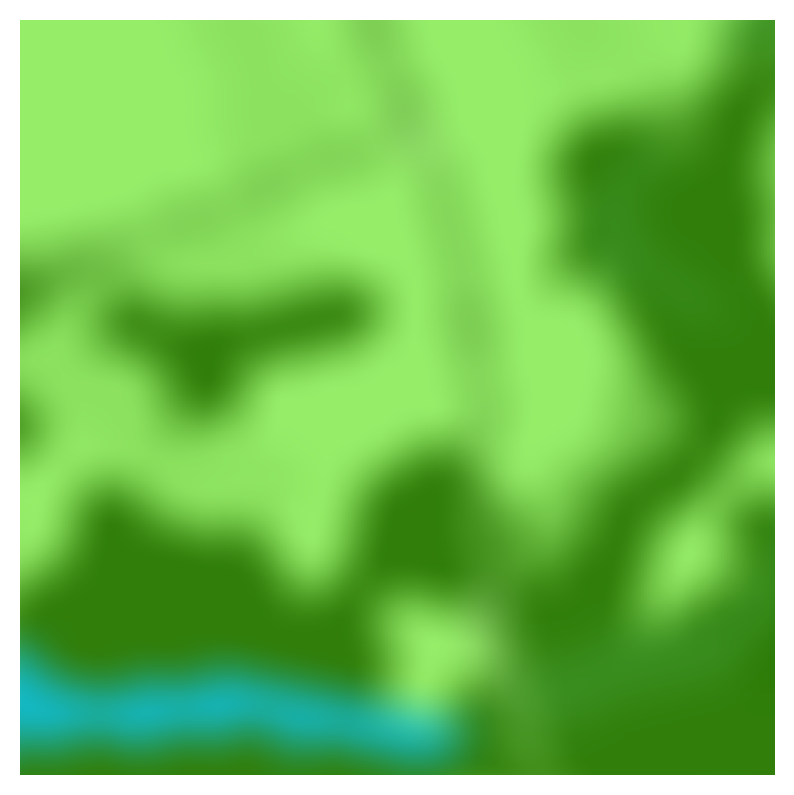

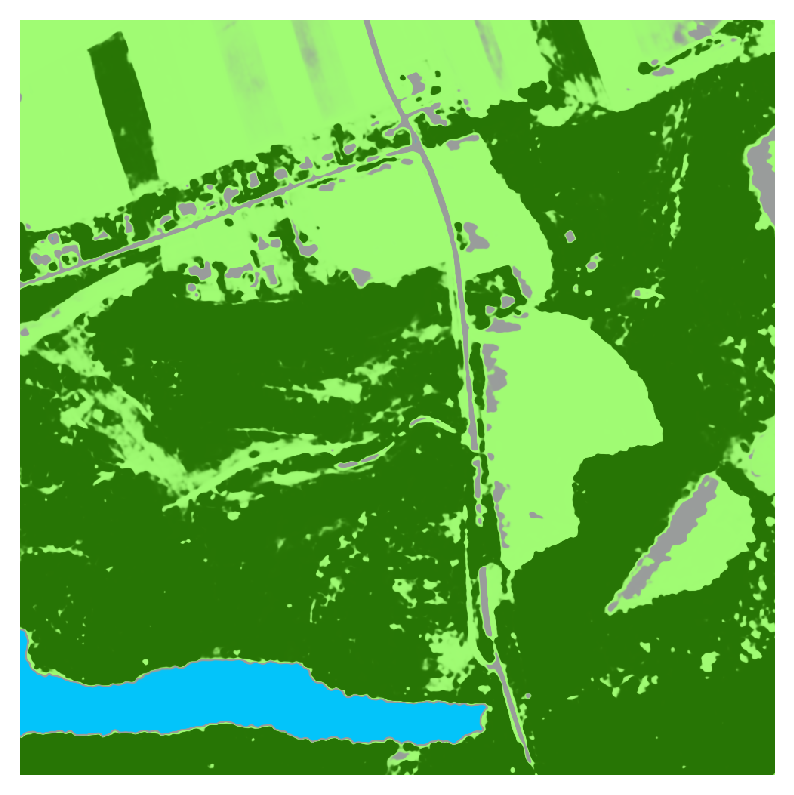

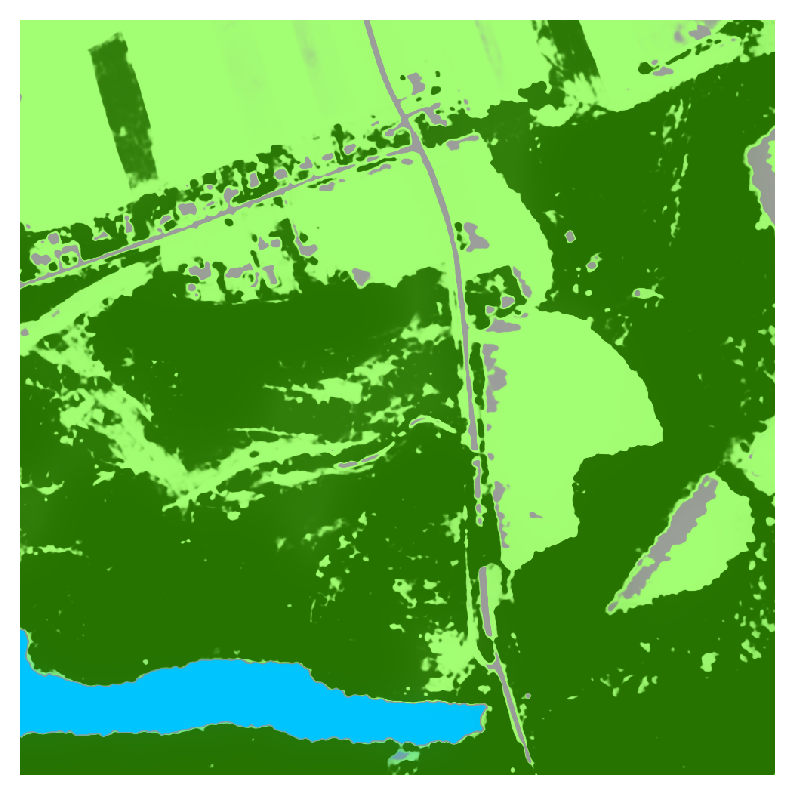

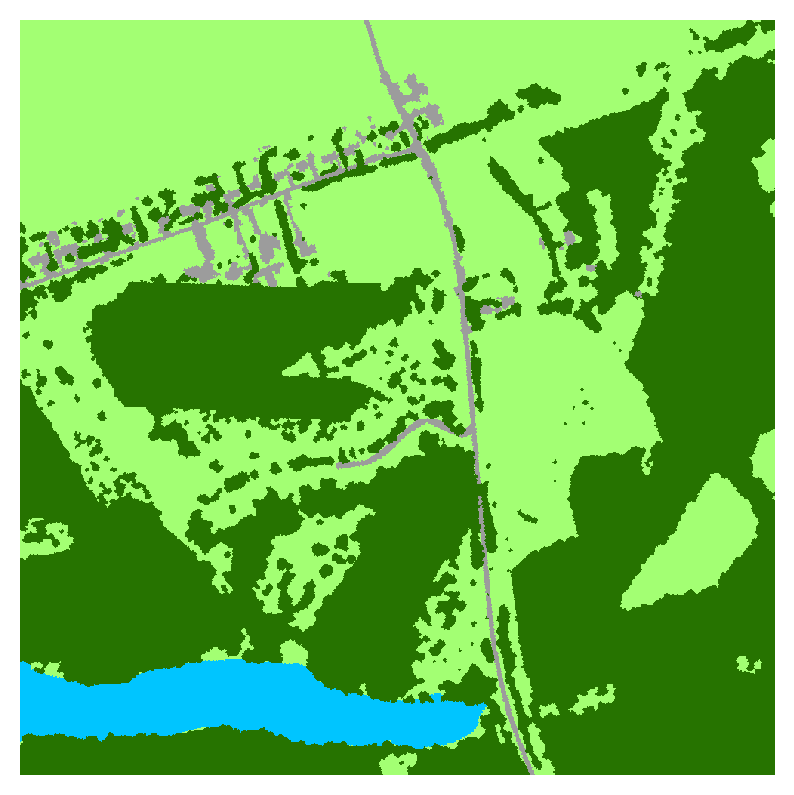

In [9]:
h1, h2 = 2000, 3000
w1, w2 = 3000, 4000 

dpi = 200

t_images = [
    img_pa[:3, h1:h2, w1:w2].T.swapaxes(0,1),
    lc.vis_lc(prior_pa[:, h1:h2, w1:w2],lc_type).T.swapaxes(0,1),
    lc.vis_lc(q_pa[:, h1:h2, w1:w2],lc_type).T.swapaxes(0,1),
    lc.vis_lc(r_pa[:, h1:h2, w1:w2],lc_type).T.swapaxes(0,1),
    lc.vis_lc(hr_labels_pa[h1:h2, w1:w2],lc_type).T.swapaxes(0,1)
]

t_labels = [
    "naip",
    "prior-blurred-nlcd",
    "q-predictions",
    "r-predictions",
    "highres-labels"
]

for img, label in zip(t_images, t_labels):
    plt.figure(figsize=(5,5), dpi=dpi)
    plt.imshow(img,interpolation='none')
    plt.axis("off")
    plt.savefig(f"visualize_chesapeake_predictions-from_npy-patches/pa-tile1-{label}.png", bbox_inches="tight")
    plt.show()
    plt.close()

# NY from npy files

In [10]:
tile_id_ny = '4207539_se_18_1'
prior_ny = np.load(f'ny_pa_data_as_npy/prior_ny_{tile_id_ny}.npy')
q_ny = np.load(f'ny_pa_data_as_npy/q_ny_{tile_id_ny}.npy')
img_ny = np.load(f'ny_pa_data_as_npy/img_ny_{tile_id_ny}.npy')

data_dir_ny = '/home/esther/torchgeo_data/cvpr_chesapeake_landcover/ny_1m_2013_extended-debuffered-test_tiles'
hr_labels_ny = rasterio.open(os.path.join(data_dir_ny, f'm_{tile_id_ny}_lc.tif')).read()[0]

impervious_idxs_highres_orig = [4,5,6]
impervious_idx_condensed = 4
for c_idx in impervious_idxs_highres_orig:
    hr_labels_ny[hr_labels_ny == c_idx] = impervious_idx_condensed

hr_labels_ny = hr_labels_ny - 1

In [11]:
# prior is already blurred and should already by normalized
prior_ny = prior_ny / prior_ny.sum(axis=0)
z_ny = (q_ny.T / q_ny.sum(axis=(1,2))).T
r_ny = (z_ny * prior_ny) /(z_ny * prior_ny).sum(axis=0)

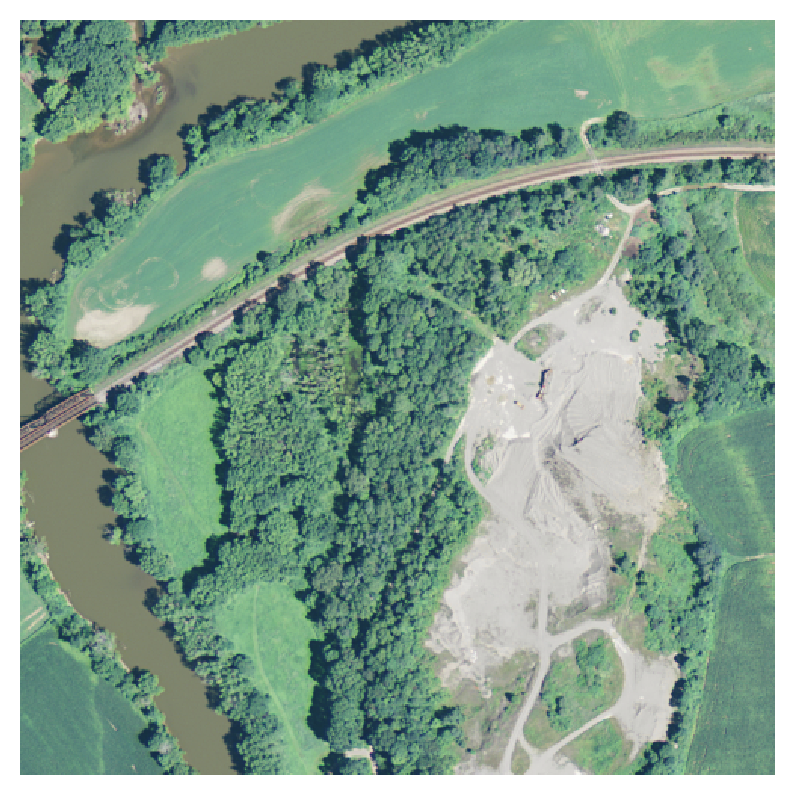

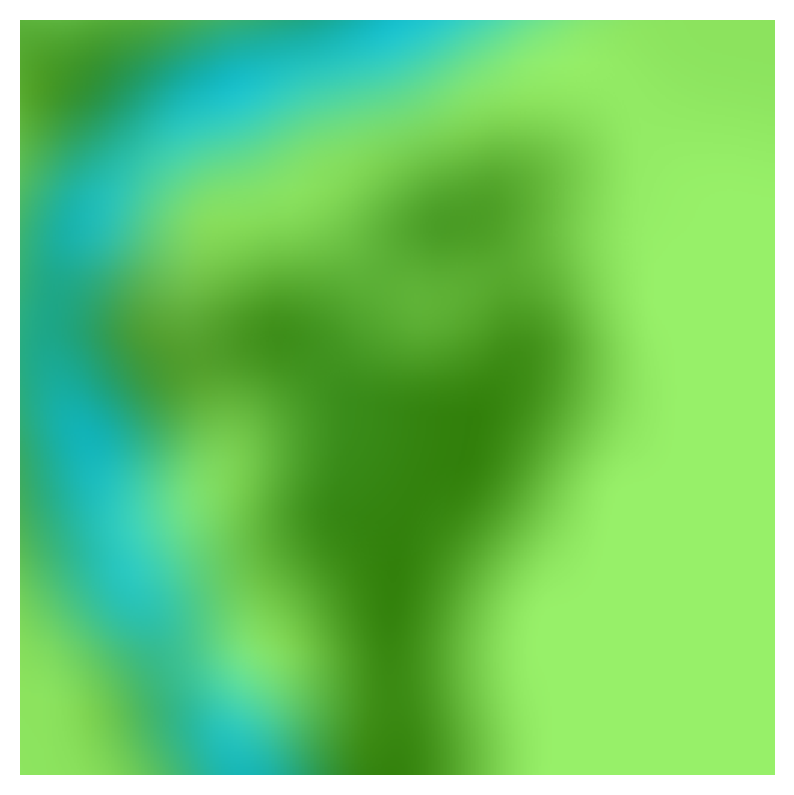

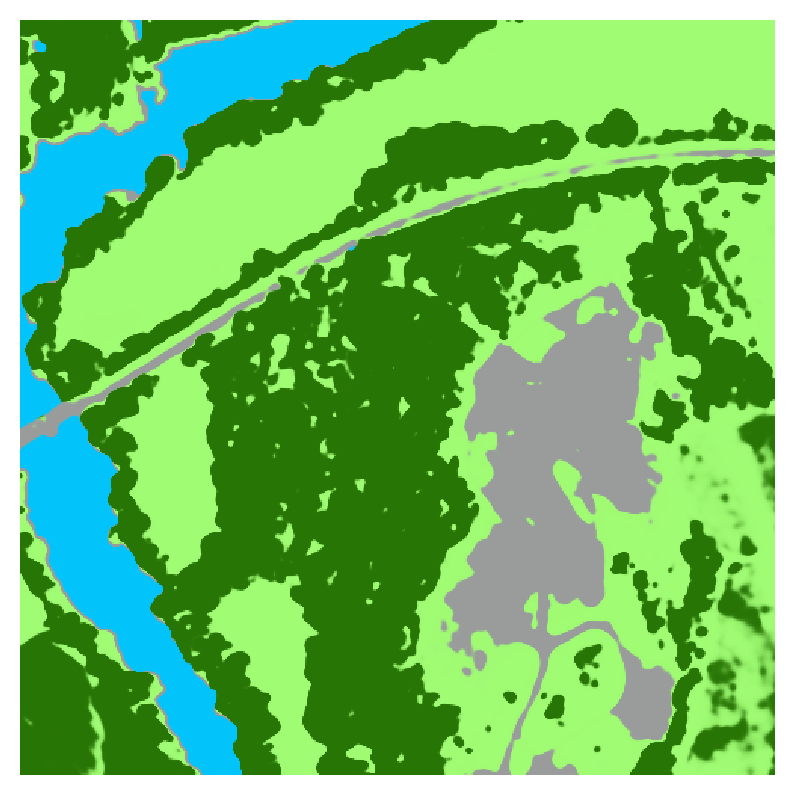

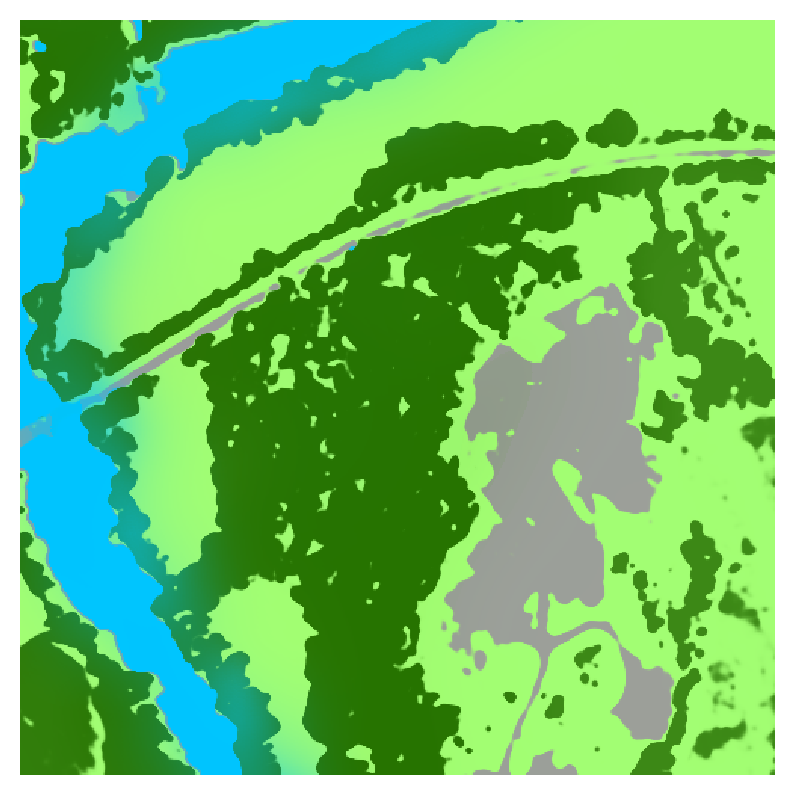

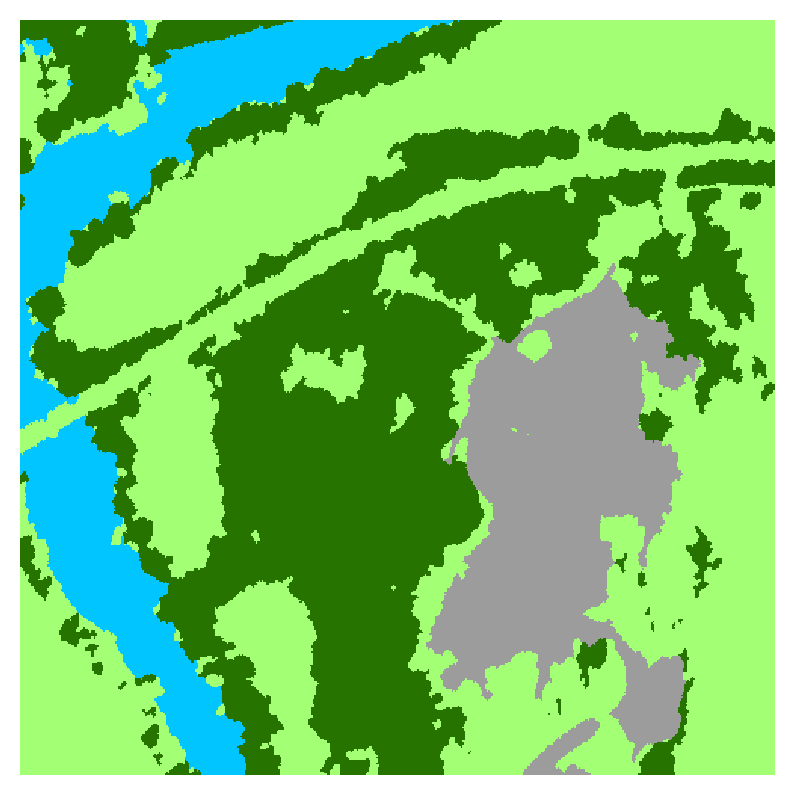

In [12]:
h1, h2 = 4000,4500
w1, w2 = 1500,2000

dpi = 200

t_images = [
    img_ny[:3, h1:h2, w1:w2].T.swapaxes(0,1),
    lc.vis_lc(prior_ny[:, h1:h2, w1:w2],lc_type).T.swapaxes(0,1),
    lc.vis_lc(q_ny[:, h1:h2, w1:w2],lc_type).T.swapaxes(0,1),
    lc.vis_lc(r_ny[:, h1:h2, w1:w2],lc_type).T.swapaxes(0,1),
    lc.vis_lc(hr_labels_ny[h1:h2, w1:w2],lc_type).T.swapaxes(0,1)
]

t_labels = [
    "naip",
    "prior-blurred-nlcd",
    "q-predictions",
    "r-predictions",
    "highres-labels"
]

for img, label in zip(t_images, t_labels):
    plt.figure(figsize=(5,5), dpi=dpi)
    plt.imshow(img,interpolation='none')
    plt.axis("off")
    plt.savefig(f"visualize_chesapeake_predictions-from_npy-patches/ny-tile1-{label}.png", bbox_inches="tight")
    plt.show()
    plt.close()